In [113]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import MDS
import re

In [114]:
import spacy
from spacy.lang.en import stop_words

In [115]:
# Documents
doc = pd.read_csv('edmunds_extraction.csv', header=None)
doc

,0,1,2
0,wishnhigh1,April 2002,The problem is that they are HUGE generalizat...
1,kd6aw1,April 2002,Have found out that with some of the more pow...
2,fwatson,April 2002,How does your theory explain English cars? A ...
3,dave330i,April 2002,"""Being that it is an automatic I can enjoy my..."
4,blueguydotcom,April 2002,"He did mention ""in rush hour traffic."" Like t..."
...,...,...,...
5145,laurasdada,May 2006,"I had a '99 300M, loved it. New 300? Well, th..."
5146,ivorypearlg,May 2006,I've been in the 300M and 300C... Much differ...
5147,shipo,May 2006,"I don't know, maybe it's just me or maybe my ..."
5148,dhanley,May 2006,"Actually, the m35x gets 17/24 mpg, same as th..."


In [116]:
#pip install nltk

In [117]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TYS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
doc.columns = ["users", "time", "txt"]
doc.head()

,users,time,txt
0,wishnhigh1,April 2002,The problem is that they are HUGE generalizat...
1,kd6aw1,April 2002,Have found out that with some of the more pow...
2,fwatson,April 2002,How does your theory explain English cars? A ...
3,dave330i,April 2002,"""Being that it is an automatic I can enjoy my..."
4,blueguydotcom,April 2002,"He did mention ""in rush hour traffic."" Like t..."


In [119]:
# tokenize and lower case
import nltk
from nltk import word_tokenize

tokens = []
for i in range(len(doc)):
    tokens.append(word_tokenize(doc.loc[i,'txt'].lower()))
doc['txt_tokenized'] = tokens

In [120]:
doc.head()

,users,time,txt,txt_tokenized
0,wishnhigh1,April 2002,The problem is that they are HUGE generalizat...,"[the, problem, is, that, they, are, huge, gene..."
1,kd6aw1,April 2002,Have found out that with some of the more pow...,"[have, found, out, that, with, some, of, the, ..."
2,fwatson,April 2002,How does your theory explain English cars? A ...,"[how, does, your, theory, explain, english, ca..."
3,dave330i,April 2002,"""Being that it is an automatic I can enjoy my...","[``, being, that, it, is, an, automatic, i, ca..."
4,blueguydotcom,April 2002,"He did mention ""in rush hour traffic."" Like t...","[he, did, mention, ``, in, rush, hour, traffic..."


In [121]:
attributes = pd.read_csv('Attributes.csv', header=0)
attributes

,Feature,Mapping
0,luxury,comfort
1,room,comfort
2,tall,comfort
3,interior,comfort
4,interiors,comfort
...,...,...
104,replacement,maintenance
105,suspension,performance
106,transmission,performance
107,transmissions,performance


In [122]:
features = [feature.lower() for feature in attributes['Feature'].tolist()]
mapping = [map_item.lower() for map_item in attributes['Mapping'].tolist()]
    

In [123]:
mapping_dict = {}

for i in range(len(features)):
    mapping_dict[features[i]] = mapping[i]

### Remove stopwords/punctuations

In [124]:
stop_words = list(stop_words.STOP_WORDS)
punc = ['.',',','!','?',';',':',"'","''", '"','``','(',')','[',']','{','}','-','...','–', '/','\\','&','%','$','#','@','+',
    '*','=','>','<','|','~','_']

In [125]:
def remove_stopwords(lst):
    tokens_wo_stopwords = []
    for word in lst:
        if word not in stop_words:
            if word not in punc:
                tokens_wo_stopwords.append(word)
    return tokens_wo_stopwords

### Replace feature words into to mapping words

In [126]:
def features_to_mapping(lst):
    
    new_lst = []
    for word in lst:
        new_lst.append(mapping_dict.get(word, word))
        
    return new_lst

In [127]:
doc["txt_token_mapped"] = doc["txt_tokenized"].apply(features_to_mapping)

In [128]:
doc["txt_wo_stopwords"] = doc["txt_token_mapped"].apply(remove_stopwords)

### Attribute Frequency

In [129]:
txt_combined = []

for i in range(len(doc)):
    txt_combined.extend(doc.loc[i, "txt_wo_stopwords"]) 

In [130]:
freq_dist = dict(nltk.FreqDist(word for word in txt_combined))
freq_dist

{'problem': 197,
 'huge': 69,
 'generalizations': 4,
 'talking': 203,
 'japanese': 196,
 'exclusivly': 1,
 'honda': 229,
 'toyota': 131,
 'subaru': 140,
 'mazda': 76,
 'isuzu': 4,
 'mitsubishi': 19,
 'daihatsu': 2,
 'suzuki': 12,
 'far': 290,
 'makes': 289,
 'culture': 5,
 'american': 139,
 'european': 88,
 'capable': 46,
 'having': 193,
 'higher': 134,
 'quality': 205,
 '70': 58,
 'cars': 1963,
 'help': 99,
 'generalization': 5,
 'stop': 108,
 'brands': 89,
 'nations': 1,
 'found': 144,
 'powerful': 93,
 'like': 1835,
 'g35': 1327,
 'corvette': 40,
 'difference': 315,
 'performance': 8905,
 'practical': 25,
 'standpoint': 12,
 'issue': 145,
 'faster': 180,
 'dream': 17,
 'driving': 774,
 'killing': 4,
 'getting': 324,
 'tickets': 3,
 'time': 603,
 'love': 268,
 'enjoy': 126,
 'coffee': 6,
 'shave': 4,
 'talk': 90,
 'cel': 3,
 'phone': 34,
 'hug': 5,
 'wife': 146,
 'rush': 18,
 'hour': 28,
 'traffic': 115,
 'feel': 419,
 'urge': 2,
 'shift': 92,
 'manumatic': 12,
 'pretend': 5,
 'stick

In [131]:
features_dist = {}
features_list = attributes['Mapping'].tolist()

for feature in features_list:
    features_dist[feature] = freq_dist.get(feature, None)


In [132]:
features_dist

{'comfort': 1999,
 'console': 491,
 'efficiency': 978,
 'performance': 8905,
 'safety': 881,
 'styling': 715,
 'maintenance': 371}

In [133]:
top_5_features_dist = dict(sorted(features_dist.items(), key=lambda item: item[1], reverse=True)[:5])
top_5_features_dist

{'performance': 8905,
 'comfort': 1999,
 'efficiency': 978,
 'safety': 881,
 'styling': 715}

In [134]:
# Convert to DataFrame with keys as a separate column
top_5_features_dist = pd.DataFrame(list(top_5_features_dist.items()), columns=['Feature', 'Frequency'])
top_5_features_dist

,Feature,Frequency
0,performance,8905
1,comfort,1999
2,efficiency,978
3,safety,881
4,styling,715


### Lift Matrix

In [135]:
brand = pd.read_csv('top10_brands.csv', header=0)

In [136]:
top_5_brands = brand[:5]
top_5_brands

,brand
0,bmw
1,acura
2,infiniti
3,audi
4,mercedes


In [137]:
pairs = []
for i in range(len(top_5_brands['brand'])):
    for j in range(i + 1,len(top_5_features_dist['Feature'])):
        pair = (top_5_brands['brand'][i], top_5_features_dist['Feature'][j])
        pairs.append(pair)

In [138]:
# calculate presence of each pair in txt
pairs_freq_dict = {}
for pair in pairs:
    pairs_freq_dict[pair] = 0

In [139]:
txt_wo_stopwords_lst = doc["txt_wo_stopwords"].tolist()

for key, value in pairs_freq_dict.items():
    brand = key[0]
    feature = key[1]
    for lst in txt_wo_stopwords_lst:
        if brand in lst and feature in lst:
            pairs_freq_dict[key] = pairs_freq_dict[key] + 1

pairs_freq_dict

{('bmw', 'comfort'): 319,
 ('bmw', 'efficiency'): 117,
 ('bmw', 'safety'): 137,
 ('bmw', 'styling'): 152,
 ('acura', 'efficiency'): 29,
 ('acura', 'safety'): 45,
 ('acura', 'styling'): 60,
 ('infiniti', 'safety'): 31,
 ('infiniti', 'styling'): 41,
 ('audi', 'styling'): 46}

In [140]:
top_5_brands_freq = pd.read_csv('top10_brands_frequency.csv', header=0)
top_5_brands_freq = top_5_brands_freq[:5]

In [141]:
top_5_brands_freq

,brand,frequency
0,bmw,4479
1,acura,2697
2,infiniti,1922
3,audi,988
4,mercedes,699


In [142]:
top5_features_dict = top_5_features_dist.set_index('Feature')['Frequency'].to_dict()

top5_brands_dict = top_5_brands_freq.set_index('brand')['frequency'].to_dict()

lift_dict = {}
total_txt = len(doc)  # Replace 'doc' with the actual variable that represents your total document count

for key, value in pairs_freq_dict.items():
    brand, feature = key  # Unpack the key which is a tuple of (brand, feature)
    AB = value
    count_A = top5_brands_dict[brand]  # Get brand count
    count_B = top5_features_dict[feature]  # Get feature count

    # Calculate lift, ensuring that count_A and count_B are not zero
    if count_A > 0 and count_B > 0:
        lift_dict[key] = total_txt * AB / (count_A * count_B)

In [143]:
lift_dict

{('bmw', 'comfort'): 0.18348647420383557,
 ('bmw', 'efficiency'): 0.1375539840318213,
 ('bmw', 'safety'): 0.17880136310222075,
 ('bmw', 'styling'): 0.2444351808049062,
 ('acura', 'efficiency'): 0.0566220287178134,
 ('acura', 'safety'): 0.09753553892015217,
 ('acura', 'styling'): 0.16024020473408682,
 ('infiniti', 'safety'): 0.09428435428948043,
 ('infiniti', 'styling'): 0.1536496801845397,
 ('audi', 'styling'): 0.33535290620310865}

### MDS

In [144]:
# Calculate dissimilarity matrix based on lift
dissimilarity_dict = {}

for key, value in lift_dict.items():
    dissimilarity_dict[key] = 1 / value

dissimilarity_dict

{('bmw', 'comfort'): 5.449992999969565,
 ('bmw', 'efficiency'): 7.2698730395817766,
 ('bmw', 'safety'): 5.592798525972646,
 ('bmw', 'styling'): 4.091064128768523,
 ('acura', 'efficiency'): 17.660970873786408,
 ('acura', 'safety'): 10.252673139158576,
 ('acura', 'styling'): 6.240631067961165,
 ('infiniti', 'safety'): 10.60621359223301,
 ('infiniti', 'styling'): 6.508311626805589,
 ('audi', 'styling'): 2.9819333051920642}

In [145]:

data = [(brand, attribute, 1 / dissimilarity) for (brand, attribute), dissimilarity in dissimilarity_dict.items()]
dissimilarity_df = pd.DataFrame(data, columns=['Brand', 'Attribute', 'Dissimilarity'])


dissimilarity_matrix = dissimilarity_df.pivot(index='Brand', columns='Attribute', values='Dissimilarity').fillna(0)
dissimilarity_matrix

Attribute,comfort,efficiency,safety,styling
Brand,,,,
acura,0.000000,0.056622,0.097536,0.160240
audi,0.000000,0.000000,0.000000,0.335353
bmw,0.183486,0.137554,0.178801,0.244435
infiniti,0.000000,0.000000,0.094284,0.153650


In [146]:
dissimilarity_df = dissimilarity_matrix.fillna(0)
dissimilarity_df

Attribute,comfort,efficiency,safety,styling
Brand,,,,
acura,0.000000,0.056622,0.097536,0.160240
audi,0.000000,0.000000,0.000000,0.335353
bmw,0.183486,0.137554,0.178801,0.244435
infiniti,0.000000,0.000000,0.094284,0.153650


In [147]:
dissimilarity_2d_values = dissimilarity_df.values
dissimilarity_2d_values

array([[0.        , 0.05662203, 0.09753554, 0.1602402 ],
       [0.        , 0.        , 0.        , 0.33535291],
       [0.18348647, 0.13755398, 0.17880136, 0.24443518],
       [0.        , 0.        , 0.09428435, 0.15364968]])

In [148]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Make the matrix symmetric by copying the upper triangle to the lower triangle
symmetric_matrix = dissimilarity_2d_values + dissimilarity_2d_values.T - np.diag(dissimilarity_2d_values.diagonal())

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_transformed = mds.fit_transform(symmetric_matrix)

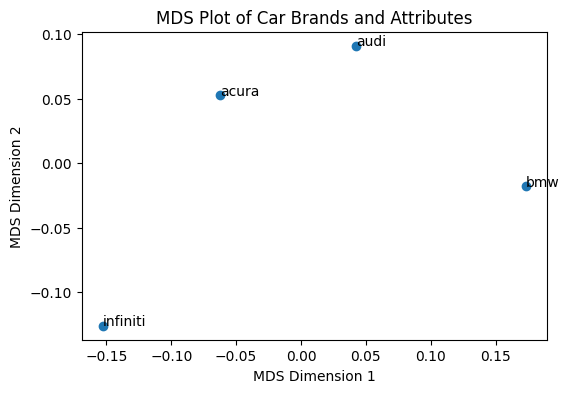

In [151]:
# Extract the coordinates
x = mds_transformed[:, 0]
y = mds_transformed[:, 1]

# Plot the results
plt.figure(figsize=(6, 4))
plt.scatter(x, y)
for i, brand in enumerate(dissimilarity_matrix.index):
    plt.text(x[i], y[i], brand)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Plot of Car Brands and Attributes')
plt.show()

###  Initial understanding of the plot

1. BMW is placed quite far from Infiniti, suggesting that in terms of the attributes considered, BMW is quite dissimilar to Infiniti.

2. Acura and Audi are relatively close, indicating some similarity in the dataset's context.

3. The plot does not show inherent clusters, suggesting that the brands are relatively spread out with respect to the attributes considered.